#**Data Science and Business Analytics Internship**

##**The Sparks Foundation Task 2**
>**Prediction using Unsupervised Machine Learning**


## Author: Aditya Phulallwar

###**Problem Definition:**
>From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

###**Data:**
>Dataset is available at: https://bit.ly/3kXTdox

###**With, all of this being known, let's get started!**
###**First,.we'll import the data set and start exploring.**

###**Importing the data and preparing it for modeling**

In [1]:
# Importing the libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [6]:
# Importing the data
df = pd.read_csv('Iris.csv')

In [7]:
# Displaying the data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


###**Summarize the Dataset**

In [8]:
# How many instances and how many attributes the data contains.
df.shape

(150, 6)

In [11]:
# Checking dtype of each column in data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
# Describing the stats
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
# Let's now take a look at the number of instances that belong to each class.
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [12]:
# Checking for missing values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### **As There is no missing values and values are numerical, we can proceed.**

<Figure size 432x288 with 0 Axes>

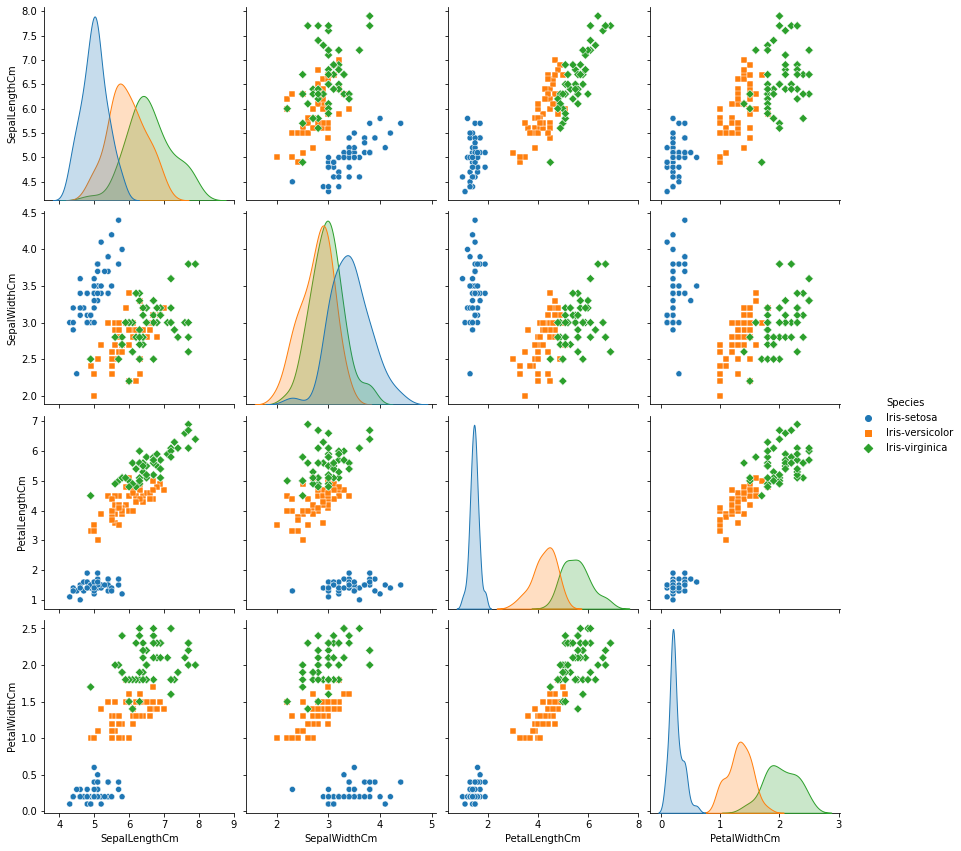

In [16]:
# Pairplt to visualize the distribution of variable 
#or the relationship between multiple variables 
#separately with subsets of your dataset.
plt.figure()
sns.pairplot(df.drop("Id", axis = 1), hue = 'Species', size = 3, markers = ["o", "s", "D"])
plt.show();

<Figure size 432x288 with 0 Axes>

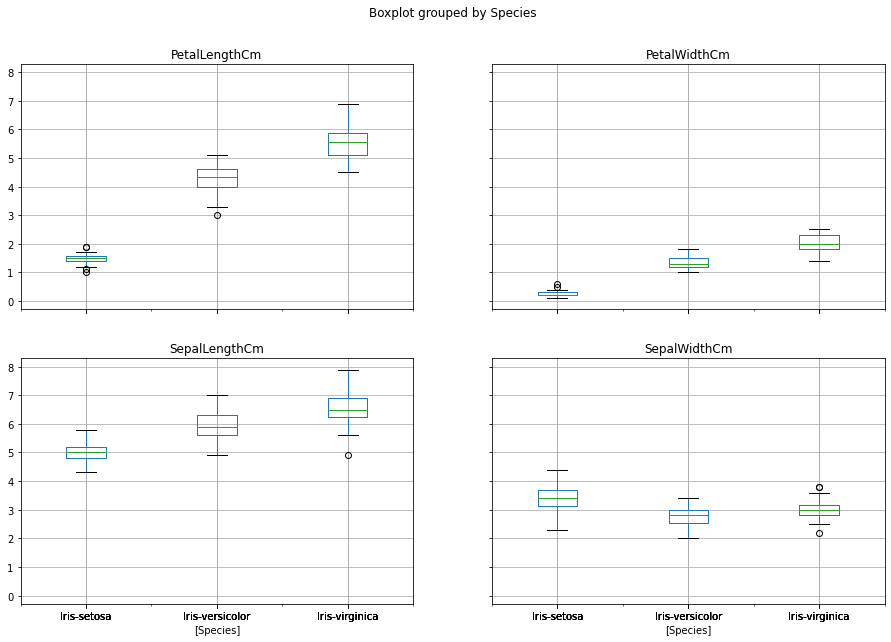

In [17]:
# Boxplot to know dispersion of the data set.
plt.figure()
df.drop("Id", axis = 1).boxplot(by = "Species", figsize = (15, 10))
plt.show();

In [51]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

le = LabelEncoder()
y = le.fit_transform(y)



### **Finding the optimum number of clusters**
>We will implement 'The eblow method' which will allow us to pick the optimum amount of clusters.

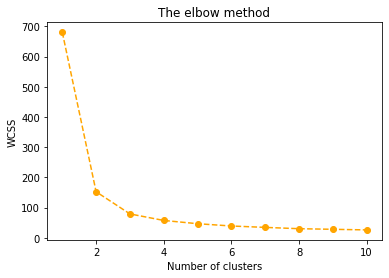

In [41]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                  max_iter = 300, n_init = 10, random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# Plotting to observe 'The elbow'
plt.plot(range(1, 11), wcss, "go--", color = 'orange')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

###**We can see that WCSS doesn't decrease significantly with every iteration**
>**From this we choose the number of clusters as 3**

In [30]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

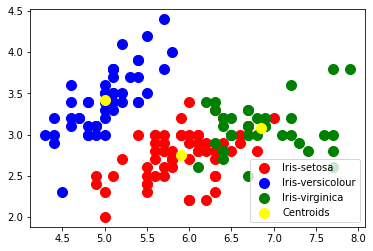

In [32]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [44]:
X[:3]*50

array([[255., 175.,  70.,  10.],
       [245., 150.,  70.,  10.],
       [235., 160.,  65.,  10.]])

In [46]:
kmeans.cluster_centers_

array([[6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [4.69      , 3.085     , 1.385     , 0.19      ],
       [5.9       , 2.91333333, 4.39333333, 1.37333333],
       [6.03684211, 2.70526316, 5.        , 1.77894737],
       [5.49      , 3.92      , 1.46      , 0.26      ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [6.63333333, 3.03333333, 4.63333333, 1.45833333],
       [5.575     , 2.56875   , 3.975     , 1.2125    ],
       [5.08      , 3.5       , 1.545     , 0.29      ]])

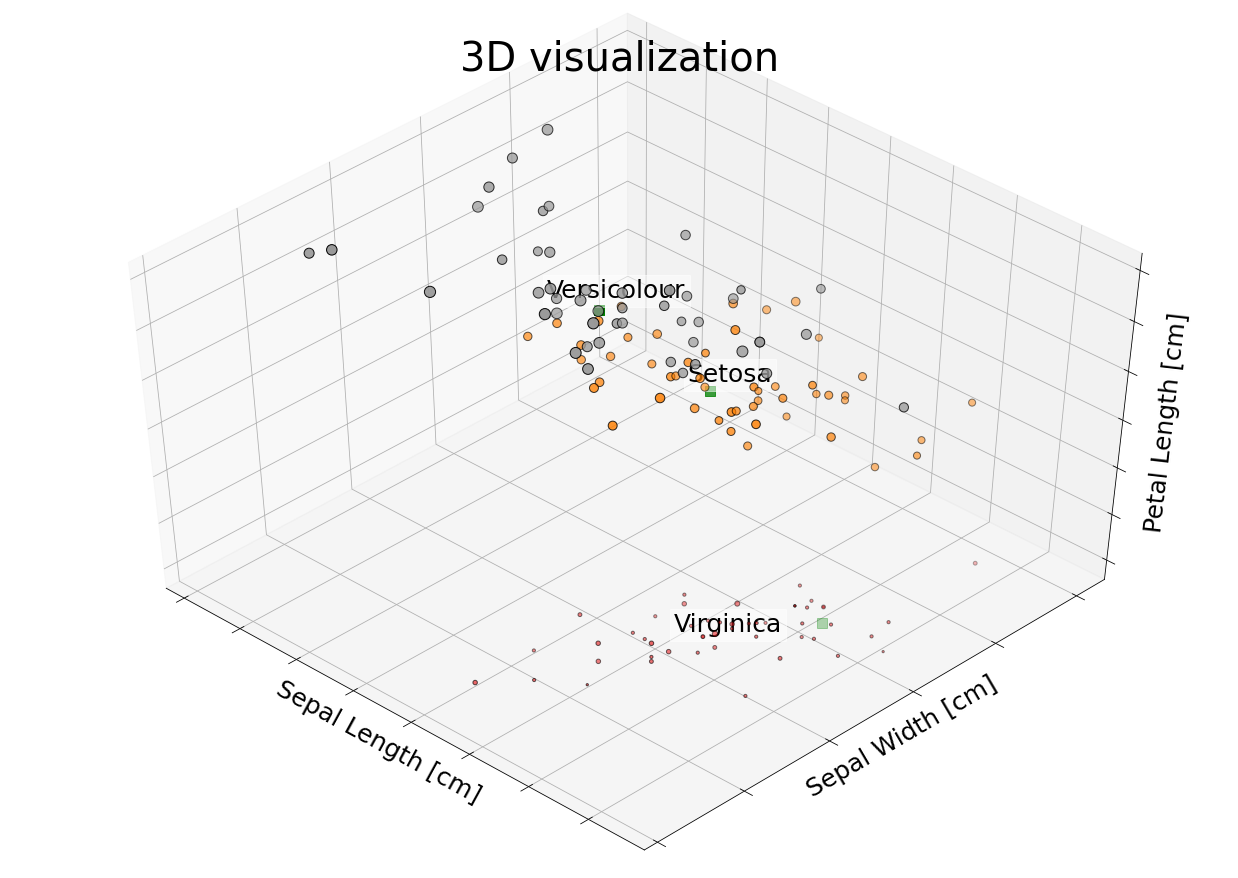

In [52]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(17, 12))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

ax.scatter(kmeans.cluster_centers_[:3, 0], kmeans.cluster_centers_[:3, 1], kmeans.cluster_centers_[:3, 2], marker = 's', c = 'green', s = 100 , label = 'centroids')

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show();

##**Conculsion:**
>**The Optimum number of clusters is 3.**